### Importing a CSV file into a Pandas DataFrame, counts the occurrences of unique values in the 'type' column, and prints the dataset's dimensions (number of rows and columns).

In [2]:
import pandas as pd
data = pd.read_csv('Breast_GSE45827.csv')
print(data['type'].value_counts())
print(data.shape)

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64
(151, 54677)


### Non-Convolutional Neural Networks
### Training a Random Forest Classifier on a dataset, evaluates its accuracy, plots a learning curve, and visualizes the confusion matrix to assess the model's performance.

Acuratețea modelului: 0.9032258064516129


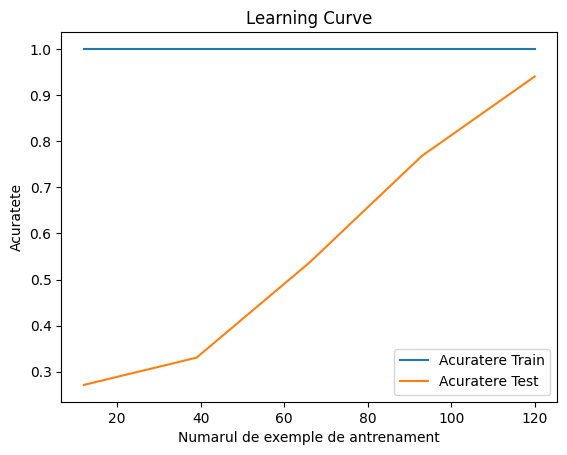

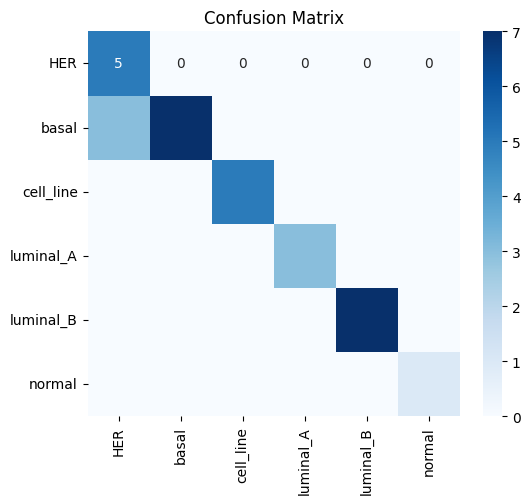

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Breast_GSE45827.csv")

X = data.drop("type", axis=1)
y = data["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Acuratere Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Acuratere Test")
plt.xlabel('Numarul de exemple de antrenament')
plt.ylabel('Acuratete')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.show()

### Backpropagation
### The code implements a basic neural network from scratch using NumPy to classify data. It includes custom activation functions (sigmoid, ReLU, softmax), a forward and backward pass for training, and an evaluation step using confusion matrix and classification report. The model is trained on a dataset with one hidden layer and optimized using gradient descent.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

data = pd.read_csv("Breast_GSE45827.csv")

X = data.drop(columns=['type'])
y = data['type']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = np.eye(len(label_encoder.classes_))[y_encoded]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
hidden_dim = 64

W1 = np.random.randn(input_dim, hidden_dim) * 0.01 
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

def forward_pass(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return A1, A2

def backward_pass(X, y, A1, A2, W1, b1, W2, b2, learning_rate=0.01):
    m = X.shape[0]

    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

def train(X_train, y_train, epochs=50, learning_rate=0.01):
    global W1, b1, W2, b2
    for epoch in range(epochs):
        A1, A2 = forward_pass(X_train)
        W1, b1, W2, b2 = backward_pass(X_train, y_train, A1, A2, W1, b1, W2, b2, learning_rate)
        if (epoch + 1) % 10 == 0:
            _, A2 = forward_pass(X_train)
            loss = -np.mean(np.sum(y_train * np.log(A2), axis=1))
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

def evaluate(X_test, y_test):
    _, A2 = forward_pass(X_test)
    predictions = np.argmax(A2, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    
    print(confusion_matrix(y_test_labels, predictions))
    print(classification_report(y_test_labels, predictions))

train(X_train, y_train, epochs=100, learning_rate=0.01)
evaluate(X_test, y_test)

Epoch 10/100, Loss: 0.7826
Epoch 20/100, Loss: 0.2622
Epoch 30/100, Loss: 0.1083
Epoch 40/100, Loss: 0.0576
Epoch 50/100, Loss: 0.0364
Epoch 60/100, Loss: 0.0256
Epoch 70/100, Loss: 0.0194
Epoch 80/100, Loss: 0.0154
Epoch 90/100, Loss: 0.0127
Epoch 100/100, Loss: 0.0107
[[5 0 0 0 0 0]
 [3 7 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 2 5 0]
 [0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00         5
           3       0.60      1.00      0.75         3
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00         1

    accuracy                           0.84        31
   macro avg       0.87      0.90      0.86        31
weighted avg       0.90      0.84      0.84        31

